# Exercise 4.10:- Coding Etiquette and Excel Reporting
In this Notebook the following steps have been done
1. Drop the First name and Surname of the customers to avoid security implications
2. Map the State column with the US regions and create two new columns for the Abbreviations of the State and the Region.
3. Spending habits across the US regions is found by creating a Bar chart with the count of the spending_flag grouped by regions.
4. The loyal customers across the various US regions have been visualized using the Bar chart
5. Customer Profile across the various Us regions has been visualized using the Bar chart.
6. Less active customers having order number less than 5 have been removed from the dataset.
7. 

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import the latest merged order, product, customer Dataset

In [2]:
# Import the merged latest dataframe from exercise 4.9
path = r'C:\Users\sorna\Desktop\Data Analysis\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, '02.Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# Security implication check.
The First name and the surname of the customers are dropped from the dataframe to avoid any security implications

In [5]:
df_latest = df.drop(['First Name', 'Surname'], axis =1)

In [6]:
df_latest['Spending_flag'].value_counts(dropna=False)

Spending_flag
Low Spender     32285131
High Spender      119728
Name: count, dtype: int64

In [7]:
df_latest.groupby(['Spending_flag']).user_id.nunique(dropna=False)

Spending_flag
High Spender      3389
Low Spender     202820
Name: user_id, dtype: int64

In [8]:
df_latest.shape

(32404859, 33)

#Create a regional segmentation. Create a new column Region from the State column from the customer Dataset

In [9]:
# Codes for the states 

state_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

In [10]:
# Match state codes to the regions
region_map = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South', 'VA': 'South',
    'DC': 'South', 'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

In [11]:
# Create the State code and Region 
df_latest['state_code'] = df_latest['State'].map(state_code)
df_latest['region'] = df_latest['state_code'].map(region_map)

# Determine whether there is a difference in spending habits between the different U.S regions

In [12]:
#df_cross_region = pd.crosstab(df_latest['region'], df_latest['Spending_flag'])
df_cross_region = pd.crosstab(df_latest['region'], df_latest['Spending_flag'], values = df['user_id'],aggfunc=pd.Series.nunique)

In [13]:
df_cross_region

Spending_flag,High Spender,Low Spender
region,,
Midwest,801,47718
Northeast,545,35843
South,1141,67596
West,902,51663


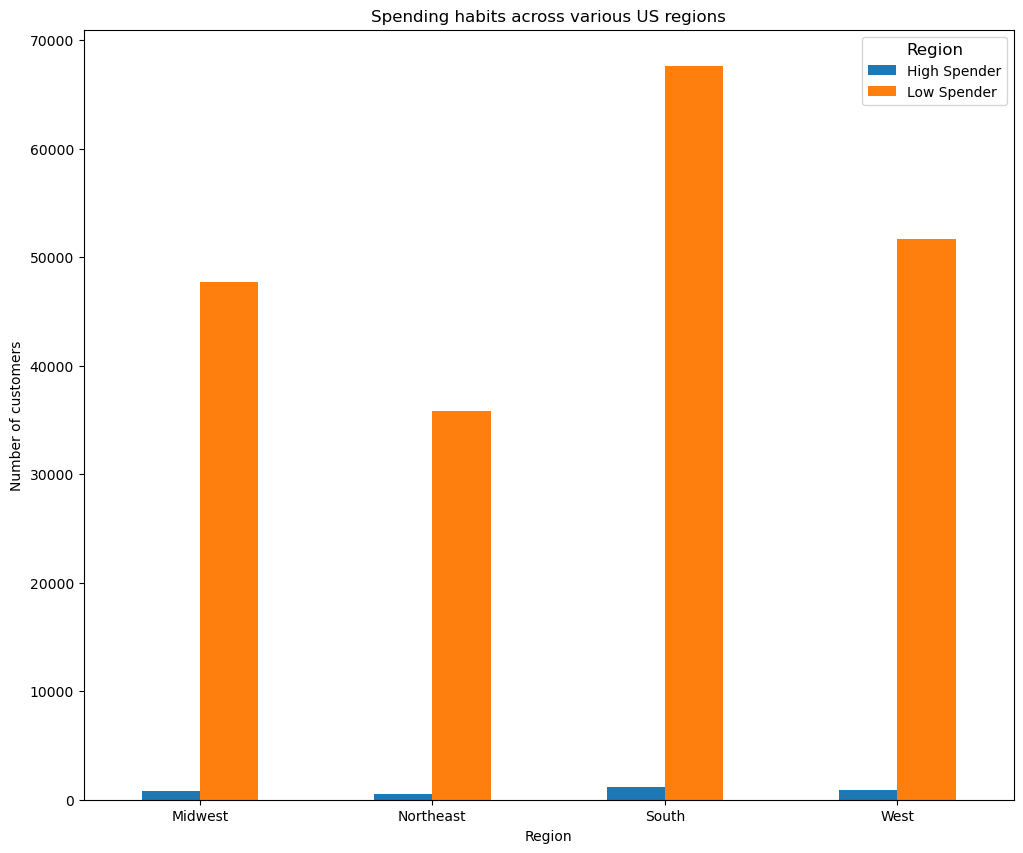

In [14]:
#region_spending = df_latest.groupby(['region','Spending_flag']).size().unstack(fill_value=0)

ax = df_cross_region.plot(
    kind='bar',
    figsize=(12,10))

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

# Add axis labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Number of customers')
ax.set_title('Spending habits across various US regions')

# Legends
ax.legend(title='Region', title_fontsize=12, fontsize=10, loc='upper right')


In [15]:
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Bar_Spending_habits_across_regions.png'))

# The South Region has the most spending customers , followed by West, Midwest and Northeast

In [21]:
df_latest.groupby(['region','loyalty_flag']).user_id.nunique()

region     loyalty_flag    
Midwest    Loyal customer       3991
           New customer        26333
           Regular customer    18195
Northeast  Loyal customer       3027
           New customer        19869
           Regular customer    13492
South      Loyal customer       5637
           New customer        37491
           Regular customer    25609
West       Loyal customer       4362
           New customer        28635
           Regular customer    19568
Name: user_id, dtype: int64

In [22]:
#df_cross_region = pd.crosstab(df_latest['region'], df_latest['loyalty_flag'])

df_cross_region = pd.crosstab(df_latest['region'], df_latest['loyalty_flag'], values = df['user_id'],aggfunc=pd.Series.nunique)

In [23]:
df_cross_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,3991,26333,18195
Northeast,3027,19869,13492
South,5637,37491,25609
West,4362,28635,19568


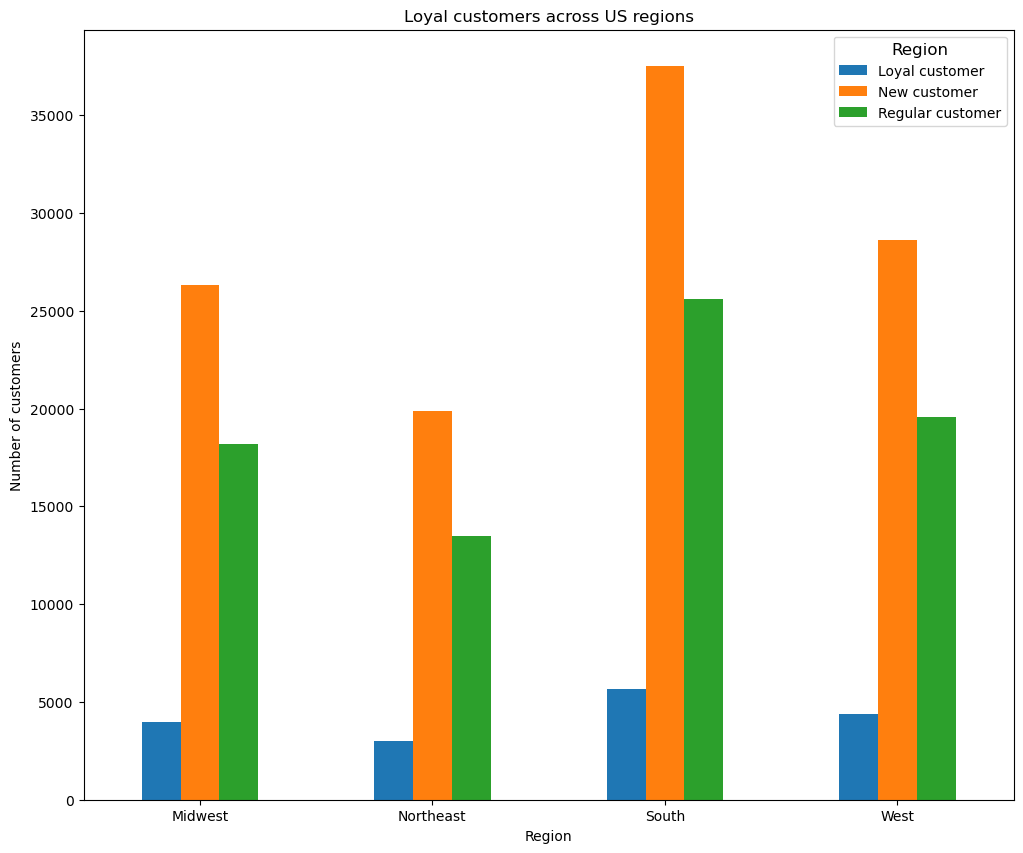

In [24]:
ax = df_cross_region.plot(
    kind='bar',
    figsize=(12,10))

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

# Add axis labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Number of customers')
ax.set_title('Loyal customers across US regions')

# Legends
ax.legend(title='Region', title_fontsize=12, fontsize=10, loc='upper right')

In [25]:
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Loyal Customers across US regions.png'))

# Remove less active customers from the Dataframe

In [26]:
# Create a new flag 'Exclusion_flag' to mark the customers with max_order < 5
df_latest['exclusion_flag'] = df_latest['max_order'] < 5

In [27]:
# Actual number of unique customers who are active and not active
df_latest.groupby(['exclusion_flag']).user_id.nunique()

exclusion_flag
False    162631
True      43578
Name: user_id, dtype: int64

In [28]:
df_latest['exclusion_flag'].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [37]:
# Create a new flag 'Exclusion_flag' to mark the customers with the order number < 5
#df_latest['exclusion_flag'] = df_latest['order_number'] < 5

In [23]:
#df_latest['exclusion_flag'].value_counts()

exclusion_flag
False    24414877
True      7989982
Name: count, dtype: int64

In [29]:
# copy the dataframe dropping the customers with exclusion_flag
df_latest = df_latest.drop(df_latest[df_latest['exclusion_flag'] == True].index)

In [30]:
df_latest.shape

(30964564, 36)

In [31]:
df_latest.to_pickle(os.path.join(path, '02.Data','Prepared Data', 'active_customers_dataset.pkl'))

In [27]:
#df_1= df_latest[['Number_of_dependents', 'Income', 'Age']].copy()

In [28]:
#df_1.shape

(24414877, 3)

In [32]:
def profile_segment(row):
    if row['Number_of_dependents'] >= 2 and row['Income'] > 120000:
        return 'Family, High Income'
    elif row['Number_of_dependents'] >= 2:
        return 'Family, Low/Med Income'
    elif row['Number_of_dependents'] == 0 and row['Age'] < 35:
        return 'Young Adult, No Kids'
    elif row['Number_of_dependents'] == 0 and row['Age'] >= 35:
        return 'Older Adult, No Kids'
    else:
        return 'Other'

# Apply to df_active
df_latest['profile_segment'] = df_latest.apply(profile_segment, axis=1)

# Quick check
df_latest['profile_segment'].value_counts(dropna=False)


profile_segment
Family, Low/Med Income    10913994
Other                      7719106
Older Adult, No Kids       5676123
Family, High Income        4591783
Young Adult, No Kids       2063558
Name: count, dtype: int64

In [36]:
df_latest.groupby(['profile_segment']).user_id.nunique()

profile_segment
Family, High Income       22634
Family, Low/Med Income    58581
Older Adult, No Kids      29795
Other                     40689
Young Adult, No Kids      10932
Name: user_id, dtype: int64

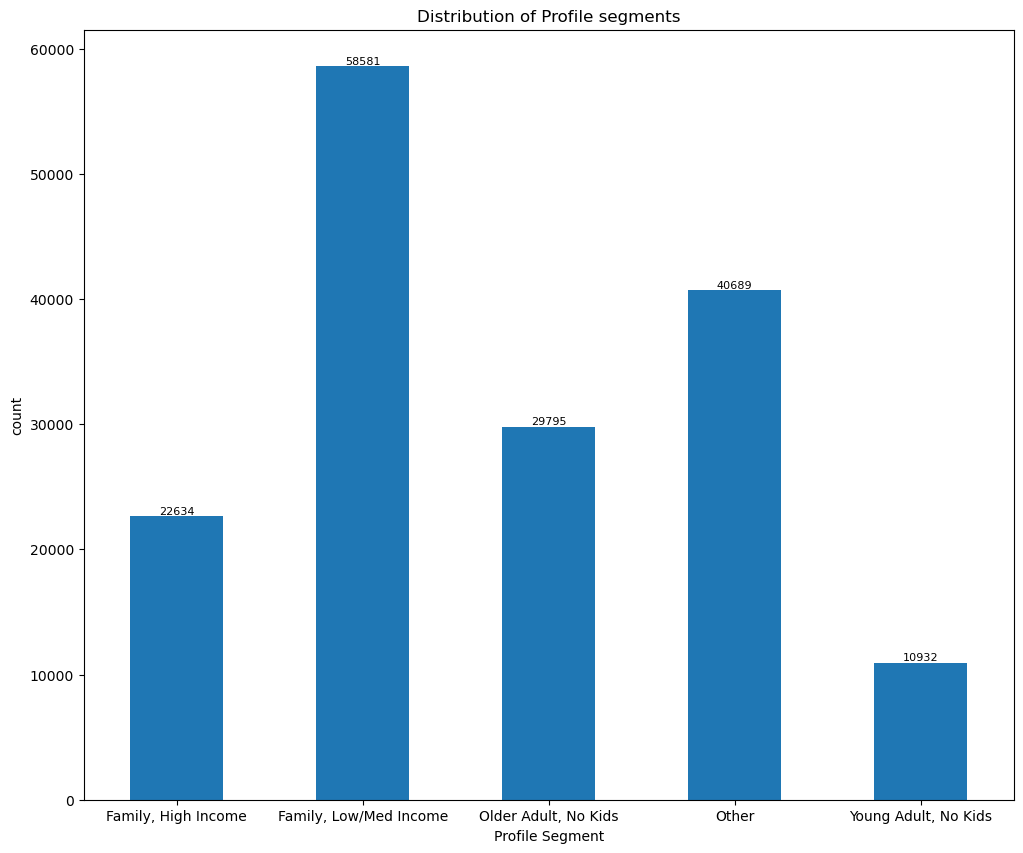

In [41]:
#Count frequency of each profile segment

#counts = df_latest['profile_segment'].value_counts()
counts = df_latest.groupby(['profile_segment']).user_id.nunique()

# Create a Bar chart with the customer profile data
ax = df_latest.groupby(['profile_segment']).user_id.nunique().plot(
    kind = 'bar',
    figsize=(12,10),
    title='Distribution of Profile segments'
)

# Add value labels on top of each bar
for i, value in enumerate(counts):
    ax.text(i, value + 0.5, 
str(value), ha= 'center', va = 'bottom', fontsize=8)

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

ax.set_xlabel('Profile Segment')
ax.set_ylabel('count')
plt.show()

In [42]:
# Export the chart
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Bar_distribution_of_customer_profile'))

In [46]:
df_cross_region = pd.crosstab(df_latest['region'], df_latest['profile_segment'],values = df_latest['user_id'],aggfunc = 'nunique')

In [47]:
df_cross_region

profile_segment,"Family, High Income","Family, Low/Med Income","Older Adult, No Kids",Other,"Young Adult, No Kids"
region,,,,,
Midwest,5423,13752,7079,9635,2487
Northeast,3974,10167,5251,7185,2004
South,7391,19719,9854,13546,3683
West,5846,14943,7611,10323,2758


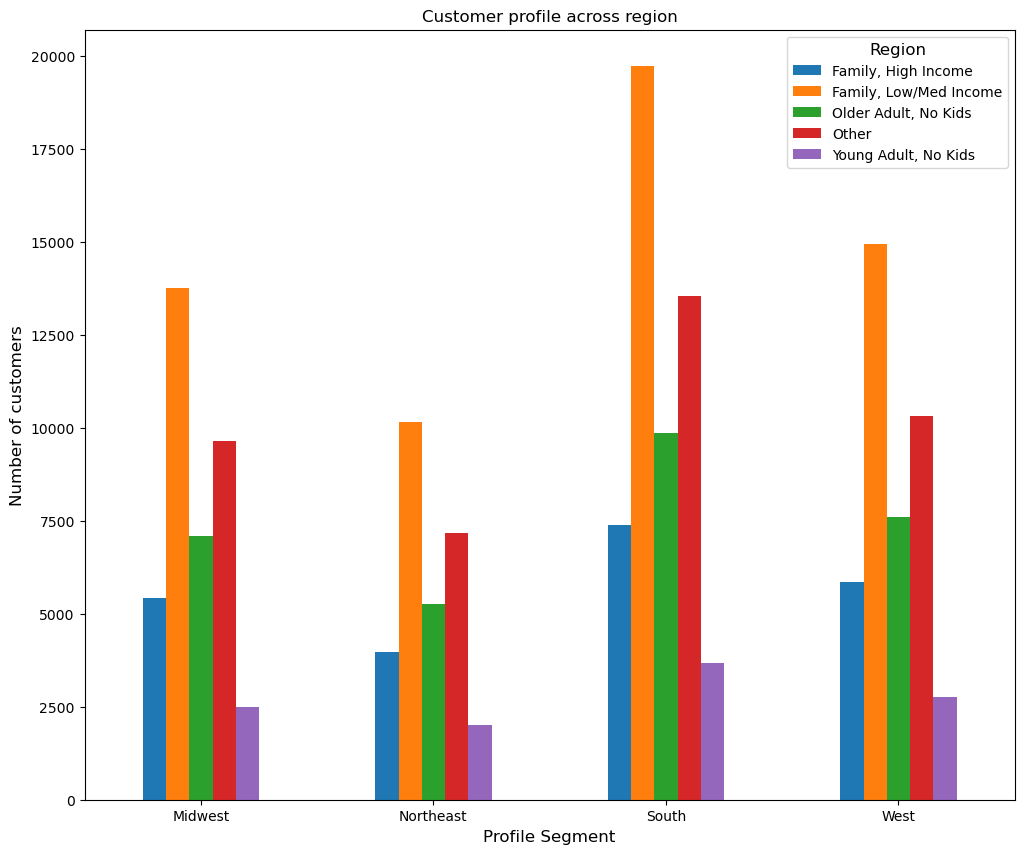

In [48]:
ax= df_cross_region.plot(
    kind='bar',
    figsize=(12,10))

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

ax.set_title('Customer profile across region')
ax.set_xlabel('Profile Segment', fontsize=12)
ax.set_ylabel('Number of customers', fontsize=12)

# Legends
ax.legend(title='Region', title_fontsize=12, fontsize=10, loc='upper right')


In [49]:
# Export the chart
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'Customer_profile_across_region.png'))

In [53]:
df_cross_department = pd.crosstab(df_latest['department_id'], df_latest['profile_segment'],values = df_latest['user_id'],aggfunc = 'nunique')

In [54]:
df_cross_department

profile_segment,"Family, High Income","Family, Low/Med Income","Older Adult, No Kids",Other,"Young Adult, No Kids"
department_id,,,,,
1,19693,48000,24730,33924,9098
2,2540,5738,2936,4088,1066
3,17445,41891,21606,29697,8045
4,21877,55621,28306,38813,10444
5,2063,4555,2366,3286,881
6,10373,23704,12552,17314,4598
7,20080,51229,26125,35744,9563
8,2061,4480,2416,3366,852
9,16047,37352,19464,26664,7192


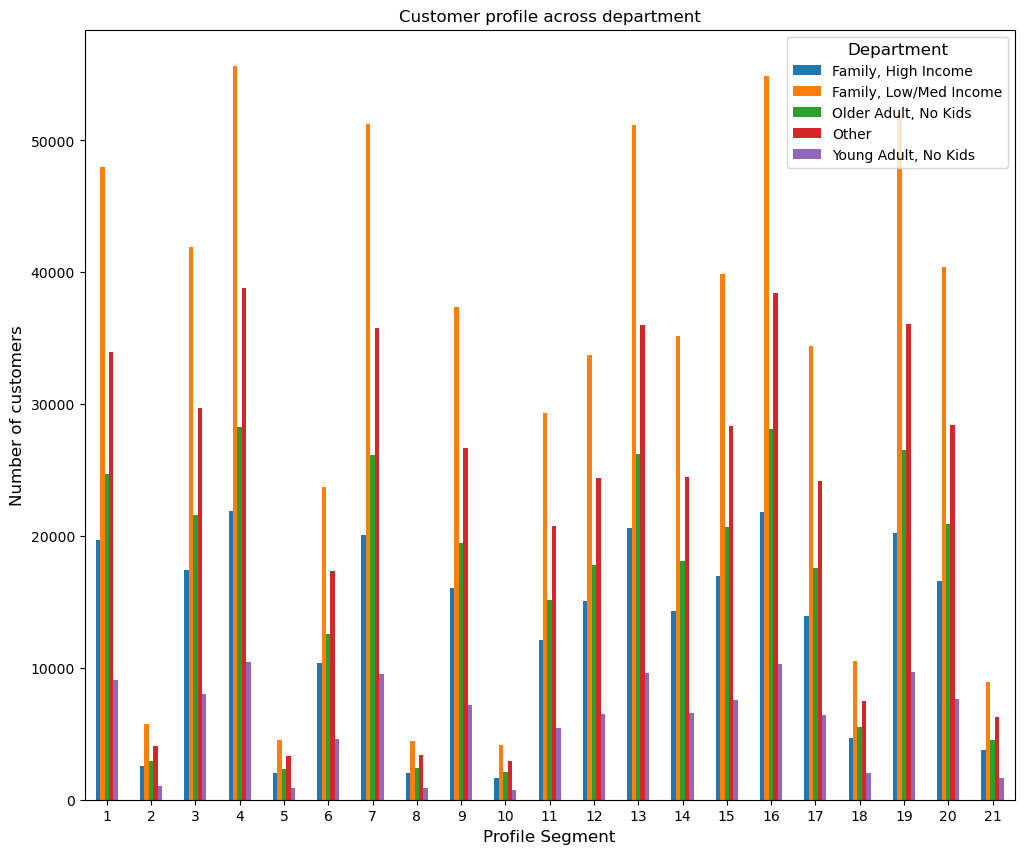

In [55]:
ax= df_cross_department.plot(
    kind='bar',
    figsize=(12,10))

#Rotate x-axis label
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)

ax.set_title('Customer profile across department')
ax.set_xlabel('Profile Segment', fontsize=12)
ax.set_ylabel('Number of customers', fontsize=12)

# Legends
ax.legend(title='Department', title_fontsize=12, fontsize=10, loc='upper right')


In [56]:
# Export the chart
ax.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'customer_profile_across_departments.png'))

# Family with low/medium income are using the instacart the most in southern region, followed by west, midwest and northeast regions.
Instacart has less number of young adults, with no kids as customers.